In [1]:
import ROOT

import pandas as pd
import numpy as np

Welcome to JupyROOT 6.12/07


In [2]:
cutflow = pd.read_csv("cutflow.csv",index_col=0)

In [3]:
procs = ['ggF','VBF','VH','ttH']
cutflow = cutflow.loc[procs]

In [4]:
cutflow.iloc[:,0]

ggF    259.134280
VBF     59.282011
VH      86.992932
ttH     41.102171
Name: ggffail, dtype: float64

In [5]:
colors = [633,417,800,607]

cats = ['#splitline{ggF category}{DDB failing}','#splitline{ggF category}{DDB passing}','#splitline{VBF category}{DDB failing}','#splitline{VBF category}{DDB passing}']

hists = {}

hstack = ROOT.THStack('stack','stack')

leg = ROOT.TLegend(0.82,0.6,1,0.85)
leg.SetBorderSize(0)
leg.SetTextSize(0.05)

for i,p in enumerate(procs):
    
    hists[p] = ROOT.TH1D(p,p,4,0,4)
    hists[p].SetFillColor(colors[i])
    hists[p].SetLineColor(colors[i])
    #h.GetYaxis().SetRangeUser(0,1)
    #h.GetXaxis().SetTitle("Signal Fraction")
    
    for j,c in enumerate(cats):
        denominator = np.sum(cutflow.iloc[:,j])
        print(c, denominator)
        
        hists[p].Fill(c,cutflow.loc[p].iloc[j]/denominator)
    
#    g = ROOT.TGraph()
#    for i,c in enumerate(cutflow.loc[p]):
#        g.SetPoint(i,i,c)

    
    hstack.Add(hists[p])
    leg.AddEntry(hists[p],p,"f")
#    print(cutflow.loc[p])

('#splitline{ggF category}{DDB failing}', 446.5113942529376)
('#splitline{ggF category}{DDB passing}', 164.01028132860097)
('#splitline{VBF category}{DDB failing}', 53.01992376738936)
('#splitline{VBF category}{DDB passing}', 24.635639746456757)
('#splitline{ggF category}{DDB failing}', 446.5113942529376)
('#splitline{ggF category}{DDB passing}', 164.01028132860097)
('#splitline{VBF category}{DDB failing}', 53.01992376738936)
('#splitline{VBF category}{DDB passing}', 24.635639746456757)
('#splitline{ggF category}{DDB failing}', 446.5113942529376)
('#splitline{ggF category}{DDB passing}', 164.01028132860097)
('#splitline{VBF category}{DDB failing}', 53.01992376738936)
('#splitline{VBF category}{DDB passing}', 24.635639746456757)
('#splitline{ggF category}{DDB failing}', 446.5113942529376)
('#splitline{ggF category}{DDB passing}', 164.01028132860097)
('#splitline{VBF category}{DDB failing}', 53.01992376738936)
('#splitline{VBF category}{DDB passing}', 24.635639746456757)


Info in <TCanvas::Print>: pdf file barchart.pdf has been created
Info in <TCanvas::Print>: png file barchart.png has been created


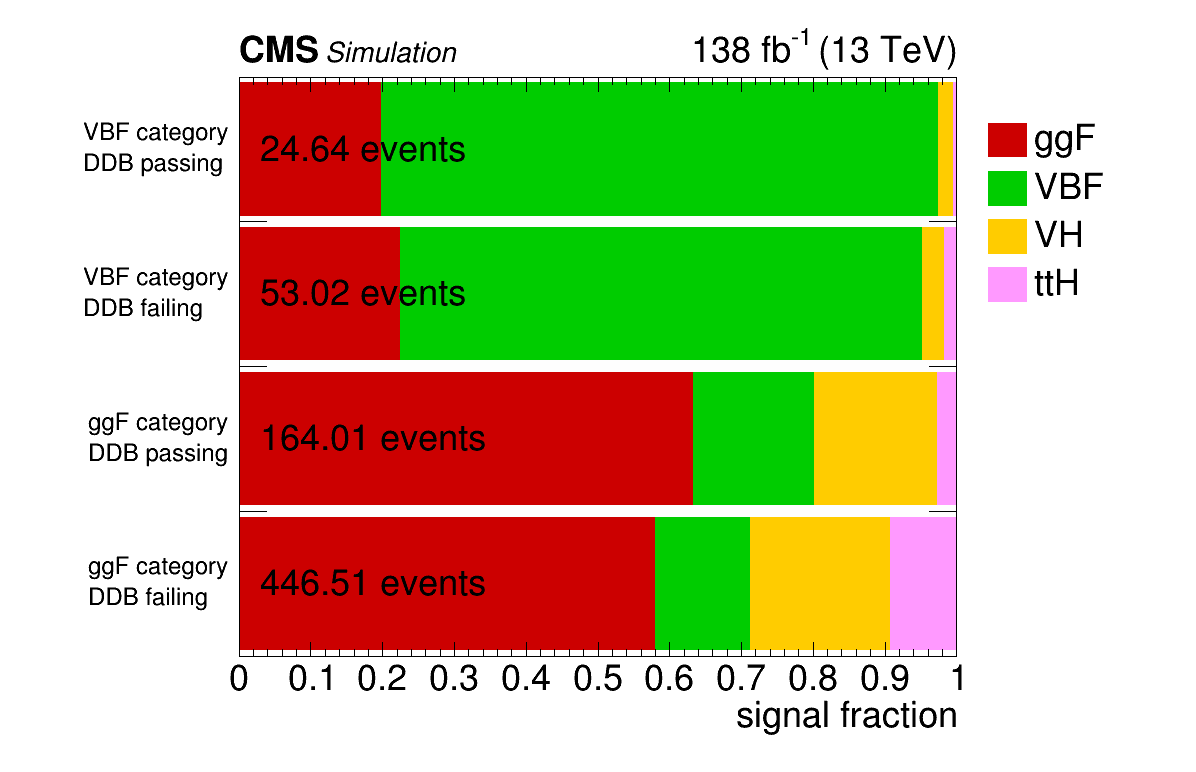

In [6]:
c = ROOT.TCanvas("c","c",1200,800)
c.Draw()

ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetHistTopMargin(0)
ROOT.gPad.SetBottomMargin(0.15)
ROOT.gPad.SetLeftMargin(0.2)
ROOT.gPad.SetRightMargin(0.2)
ROOT.gPad.SetTickx()
ROOT.gPad.SetTicky()

hwhite = ROOT.TH1D('white','white',100,0,4)
hwhite.Fill(0,1)
hwhite.Fill(1,1)
hwhite.Fill(2,1)
hwhite.Fill(3,1)
hwhite.Fill(4,1)

hwhite.Fill(0,1)
hwhite.Fill(0.99,1)
hwhite.Fill(1,1)
hwhite.Fill(1.99,1)
hwhite.Fill(2,1)
hwhite.Fill(2.99,1)
hwhite.Fill(3,1)
hwhite.Fill(3.99,1)
hwhite.SetFillColor(10)
hwhite.GetYaxis().SetRangeUser(0,1)

hstack.Draw()
hstack.GetYaxis().SetTitle("signal fraction")
hstack.GetYaxis().SetTitleSize(0.05)
hstack.GetYaxis().SetLabelSize(0.05)
hstack.GetYaxis().SetLabelSize(0.05)
hstack.GetXaxis().SetLabelSize(0.05)

hstack.Draw("hbar")
hwhite.Draw("hist hbar same")
hstack.Draw("axis same")

leg.Draw()

l1 = ROOT.TLatex()
l1.SetTextFont(42);
l1.SetTextSize(0.05);
l1.DrawLatex(0,4.1,"#bf{CMS}");

l15 = ROOT.TLatex()
l15.SetTextFont(42);
l15.SetTextSize(0.04);
l15.DrawLatex(0.12,4.1,"#it{Simulation}");

l2 = ROOT.TLatex()
l2.SetTextFont(42);
l2.SetTextSize(0.05);
l2.DrawLatex(0.63,4.1,"138 fb^{-1} (13 TeV)");

# ggF fail
l3 = ROOT.TLatex()
l3.SetTextFont(42);
l3.SetTextSize(0.05);
l3.DrawLatex(0.03,0.42,"446.51 events");

# ggF pass
l4 = ROOT.TLatex()
l4.SetTextFont(42);
l4.SetTextSize(0.05);
l4.DrawLatex(0.03,1.42,"164.01 events");

# VBF fail
l5 = ROOT.TLatex()
l5.SetTextFont(42);
l5.SetTextSize(0.05);
l5.DrawLatex(0.03,2.42,"53.02 events");

# VBF pass
l6 = ROOT.TLatex()
l6.SetTextFont(42);
l6.SetTextSize(0.05);
l6.DrawLatex(0.03,3.42,"24.64 events");

c.SaveAs('barchart.pdf')
c.SaveAs('barchart.png')

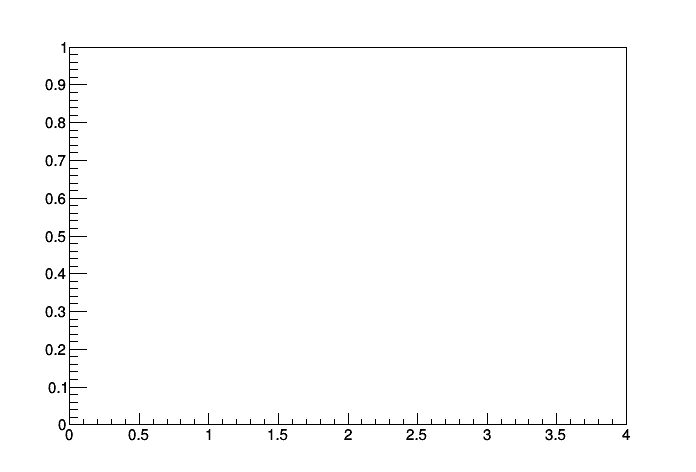

In [7]:
c = ROOT.TCanvas()
c.Draw()

hstupid = ROOT.TH1D('stupid','stupid',4,0,4)
#for i,c in enumerate(cats):
#    hstupid.Fill(i,0)
    
hstupid.Draw()

In [8]:
cutflow.iloc[0]

ggffail    259.134280
ggfpass    103.860492
vbffail     11.908628
vbfpass      4.900521
Name: ggF, dtype: float64